In [25]:
import tensorflow as tf # pip install tensorflow-gpu
import cv2 ## pip install opencv-python 
import os
import matplotlib.pyplot as plt ## pip install matplotlib
import numpy as np ## pim install numpy


In [26]:
img_array = cv2.imread("archive/test/0/PrivateTest_88305.jpg")


In [27]:
img_array.shape # rgb 

(48, 48, 3)

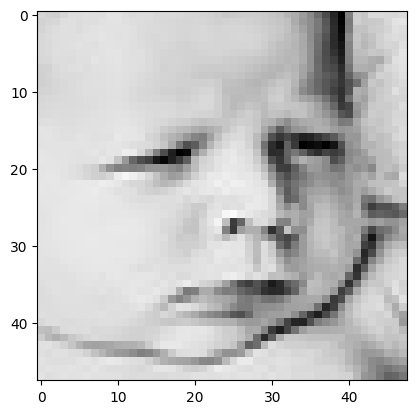

In [28]:
plt.imshow(img_array) ## BGR


In [29]:
DataDirectory = "archive/test/" # This is for the training dataset

In [30]:
classes = [ "0","1","2","3","4","5","6"] ## list of classes => exact name of your folder 

archive/test/0\PrivateTest_10131363.jpg


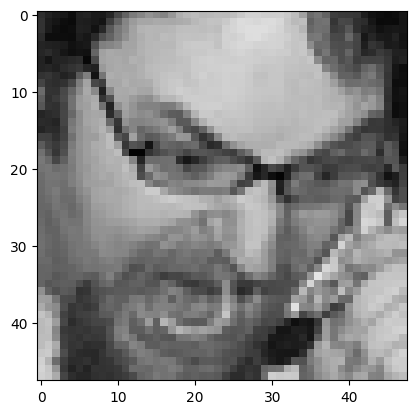

In [31]:
#  Reading all images 
for category in classes:
    # looping all classes on list
    # getting the path for all angry,sad, surprise and more
    path = os.path.join(DataDirectory,category) 
    for img in os.listdir(path):
        # list all images in each directory in the classes then 
        # read it
        print(os.path.join(path,img))
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break  

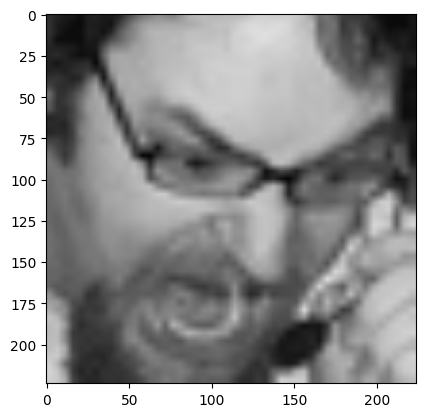

In [32]:
img_size = 224 ## imageNet => 224 x 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [33]:
new_array.shape

(224, 224, 3)

# read all the images and convert them to array 

In [34]:
training_data = [] ## data array

def create_training_data():
    """
    This is used to create training data by resizing it for
    imagenet to undertand the code
    """
    #  Reading all images 
    for category in classes:
        # looping all classes on list
        # getting the path for all angry,sad, surprise and more
        path = os.path.join(DataDirectory,category) 
        class_num = classes.index(category) # label 0,1
        for img in os.listdir(path):
            try:
                # list all images in each directory in the classes then 
                # read it
                
                img_array = cv2.imread(os.path.join(path,img))
                img_size = 224 ## imageNet => 224 x 224
                new_array = cv2.resize(img_array,(img_size,img_size))
                
                training_data.append([new_array,class_num])
            except Exception as a:
                print(a)
                pass
            

In [35]:
create_training_data()


In [36]:
print(len(training_data))

7178


In [37]:
import random 

random.shuffle(training_data)


In [38]:
x = [] ## data /feature
y = [] ## label

for features,label in training_data:
    x.append(features)
    y.append(label)

# Converting it to 4 dimesions 
x = np.array(x).reshape(-1,img_size,img_size,3)


In [39]:
x

array([[[[111, 111, 111],
         [111, 111, 111],
         [113, 113, 113],
         ...,
         [181, 181, 181],
         [181, 181, 181],
         [181, 181, 181]],

        [[111, 111, 111],
         [111, 111, 111],
         [113, 113, 113],
         ...,
         [181, 181, 181],
         [181, 181, 181],
         [181, 181, 181]],

        [[111, 111, 111],
         [111, 111, 111],
         [113, 113, 113],
         ...,
         [181, 181, 181],
         [181, 181, 181],
         [181, 181, 181]],

        ...,

        [[ 33,  33,  33],
         [ 33,  33,  33],
         [ 33,  33,  33],
         ...,
         [ 31,  31,  31],
         [ 31,  31,  31],
         [ 31,  31,  31]],

        [[ 33,  33,  33],
         [ 33,  33,  33],
         [ 33,  33,  33],
         ...,
         [ 31,  31,  31],
         [ 31,  31,  31],
         [ 31,  31,  31]],

        [[ 33,  33,  33],
         [ 33,  33,  33],
         [ 33,  33,  33],
         ...,
         [ 31,  31,  31],
        

In [40]:
x.shape

(7178, 224, 224, 3)

In [41]:
# normalize the data
x = x.astype(np.float32) /255.0; # normalizing it

MemoryError: Unable to allocate 8.05 GiB for an array with shape (7178, 224, 224, 3) and data type float64

In [ ]:
y[0]

In [ ]:
y= np.array(y)


In [ ]:
y.shape

## deep learing model for training - Transfer learning

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
tensorflow

In [ ]:
model = tensorflow.keras.applications.MobileNetV2() ## pre trained model

In [ ]:
model.summary()

In [ ]:
# Transfer learing - Tuning, weights will start from last check point

In [ ]:
base_input =model.layers[0].input ## input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output ## output

In [ ]:
final_output = layers.Dense(128)(base_output) ## aading new layer after the output of global pulling layer
final_output = layers.Activation("relu")(final_output) ## activation function
final_output = layers.Dense(64)(final_output) ##
final_output = layers.Activation("relu")(final_output)
final_output = layers.Dense(7,activation="softmax")(final_output) ## my classes are 07,classification layer

In [ ]:
new_model = keras.Model(inputs= base_input,outputs=final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=["accuracy"])


In [ ]:
new_model.fit(x,y,epochs=15) ## training

In [ ]:
new_model.save("final_model_94p49.h5")

In [ ]:
new_model = tf.keras.models.load_model("final_model_94p49.h5")

In [ ]:
new_model.evaluate ## test data, I will not test my test image

In [ ]:
frame = cv2.imread("sad_boy.jpg")

In [ ]:
frame.shape

In [ ]:
## we need face detection algorithm

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

In [ ]:
print(y)